In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import re


In [61]:
xls=pd.ExcelFile(r"C:\Users\Arjun-Meka\Documents\HospitalDatabase.xlsx")
df_Patients = pd.read_excel(xls, 'Patients')
df_EDVisits = pd.read_excel(xls, 'EDVisits')
df_AmbulatoryVisits = pd.read_excel(xls, 'AmbulatoryVisits')
df_ReAdmissionRegistry = pd.read_excel(xls, 'ReAdmissionRegistry')
df_Discharges = pd.read_excel(xls, 'Discharges')
df_Providers= pd.read_excel(xls, 'Providers')
df_EDUnique= pd.read_excel(xls, 'EDUnique')
xls.sheet_names


['Patients',
 'EDVisits',
 'AmbulatoryVisits',
 'ReAdmissionRegistry',
 'Discharges',
 'Providers',
 'EDUnique']

# Q1:Make a pair plot on Readmission Registry table & do u see any correlation between columns values

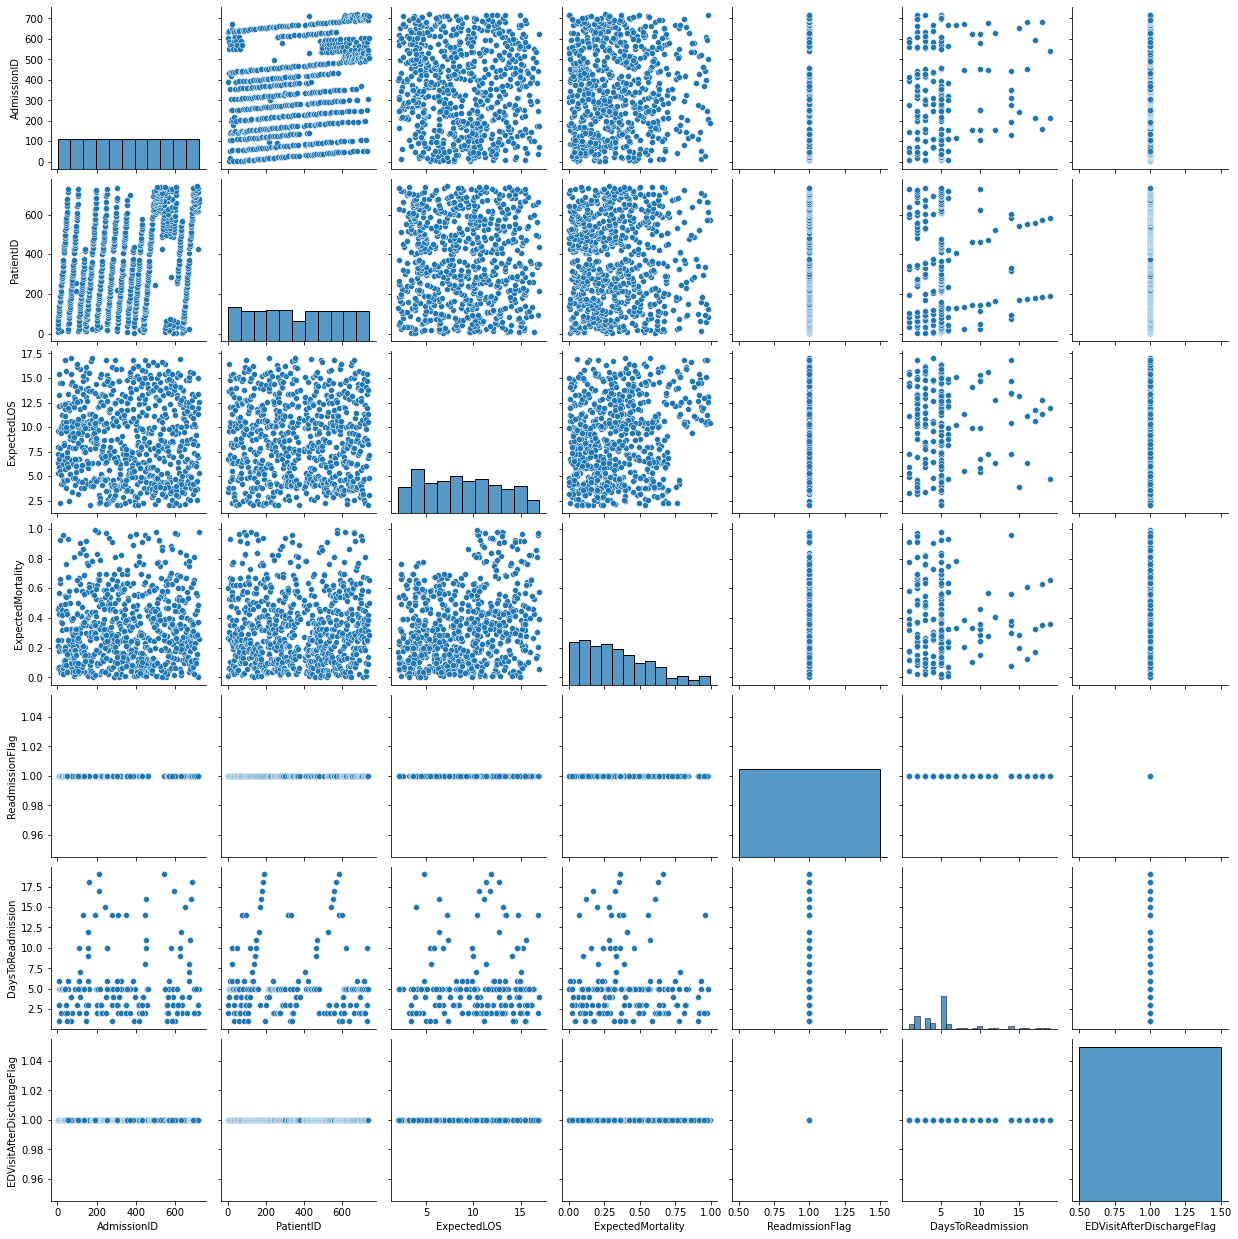

In [62]:
df_ReAdmissionRegistry.head()
sns.pairplot(df_ReAdmissionRegistry)

#there is no correlation between column values

# Q2:Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200

In [63]:
df_Patients.iloc[101:201,1:3]


,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# Q3:Create a figure object called fig using plt.figure() **** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **** Plot (x,y) on that axes and set the labels.
Note : You can plot on any x,y set of values

Text(0.5, 1.0, 'title')

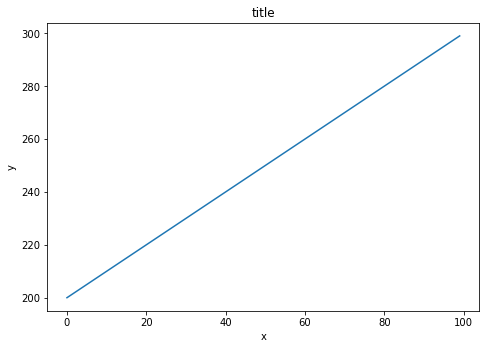

In [64]:
#assigning values to x and y
x = np.arange(0,100)
y = np.arange(200,300)

#creating fig object
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)

#assigning labels to x and y axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

# Q4: Display Data By splitting age in 4 quartiles and labeling the quartiles

In [65]:
#seperating date and time components
df_Patient=df_Patients.copy()
df_Patient['new_DateOfBirth'] = [d.date() for d in df_Patient['DateOfBirth']]
df_Patient['new_TimeOfBirth'] = [d.time() for d in df_Patient['DateOfBirth']]

#converting dateofbirth to ag
now = pd.Timestamp('now')
df_Patient['new_DateOfBirth'] = pd.to_datetime(df_Patient['new_DateOfBirth'], format="%Y-%m-%d")   
df_Patient['new_DateOfBirth'] = df_Patient['new_DateOfBirth'].where(df_Patient['new_DateOfBirth'] < now, df_Patient['new_DateOfBirth'] -  np.timedelta64(100, 'Y'))   
df_Patient['age'] = (now - df_Patient['new_DateOfBirth']).astype('<m8[Y]')  


q = df_Patient.quantile([0.00, 0.25, 0.50, 0.75, 1.00])

col = 'age'

q1 = df_Patient[((df_Patient[col]>=q[col][0.00]) & (df_Patient[col]<q[col][0.25]))]
q2 = df_Patient[((df_Patient[col]>=q[col][0.25]) & (df_Patient[col]<q[col][0.50]))]
q3 = df_Patient[((df_Patient[col]>=q[col][0.50]) & (df_Patient[col]<q[col][0.75]))]
q4 = df_Patient[((df_Patient[col]>=q[col][0.75]) & (df_Patient[col]<=q[col][1.00]))]
print('First Quartile\n')
print(q1)
print('Second Quartile\n')
print(q2)
print('Third Quartile\n')
print(q3)
print('Fourth Quartile\n')
print(q4)

First Quartile

     PatientID FirstName      LastName             DateOfBirth  Gender  \
1            2       Far         Myers 1985-11-15 02:08:42.090    Male   
17          18    Sheena         Kevin 1983-01-20 20:40:26.024    Male   
23          24  Gabriel         Joseph 1986-05-31 09:36:05.716    Male   
24          25  Lincoln         Brenda 1986-07-24 17:36:00.791    Male   
29          30       Ala       Halpert 1986-11-26 10:44:22.628  Female   
..         ...       ...           ...                     ...     ...   
923        924    Daniel      Shakesby 1980-11-28 17:57:03.702    Male   
926        927       Des  Landsborough 1980-09-11 07:55:40.693    Male   
937        938       Des        Scrace 1985-06-09 19:09:47.265    Male   
940        941       Wat       Fideler 1986-05-26 00:01:19.761    Male   
942        943   Diahann       Smeeton 1983-01-08 21:49:27.884    Male   

                       Race Language new_DateOfBirth  new_TimeOfBirth   age  
1                

# Q5:Display full name of patients who are born in 1986

In [66]:
df_Patients.head()
df_names=df_Patients.copy()

#Extracting year from date timestamped
df_names['year'] = df_names['DateOfBirth'].dt.year

#combining first and last name using regex
df_names['full_name']=df_names[['FirstName','LastName']].apply(lambda x: re.sub(' +', ' ',' '.join(x)), axis=1)
df_names.loc[df_names['year']==1986,['year','full_name']].reset_index(drop=True)

,year,full_name
0,1986,Gabriel Joseph
1,1986,Lincoln Brenda
2,1986,Ala Halpert
3,1986,Lolita Darci
4,1986,Fadel Bernardt
5,1986,Bentley Kippax
6,1986,Vale Olanda
7,1986,Britt Dureden
8,1986,Cristabel Chatel
9,1986,Constantia Group


# Q6:Create a jointplot on expected mortality & expected length of stay

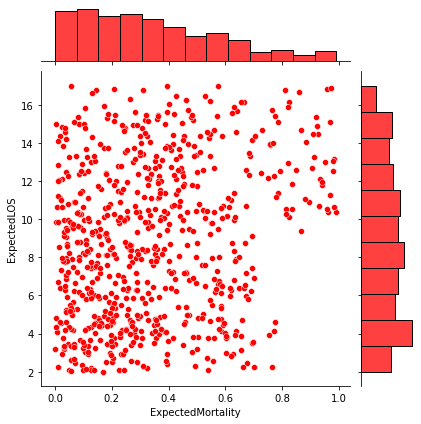

In [67]:
df_Discharges.head()
sns.jointplot(x='ExpectedMortality', y='ExpectedLOS', data=df_Discharges,color='r')

# Q7:Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition

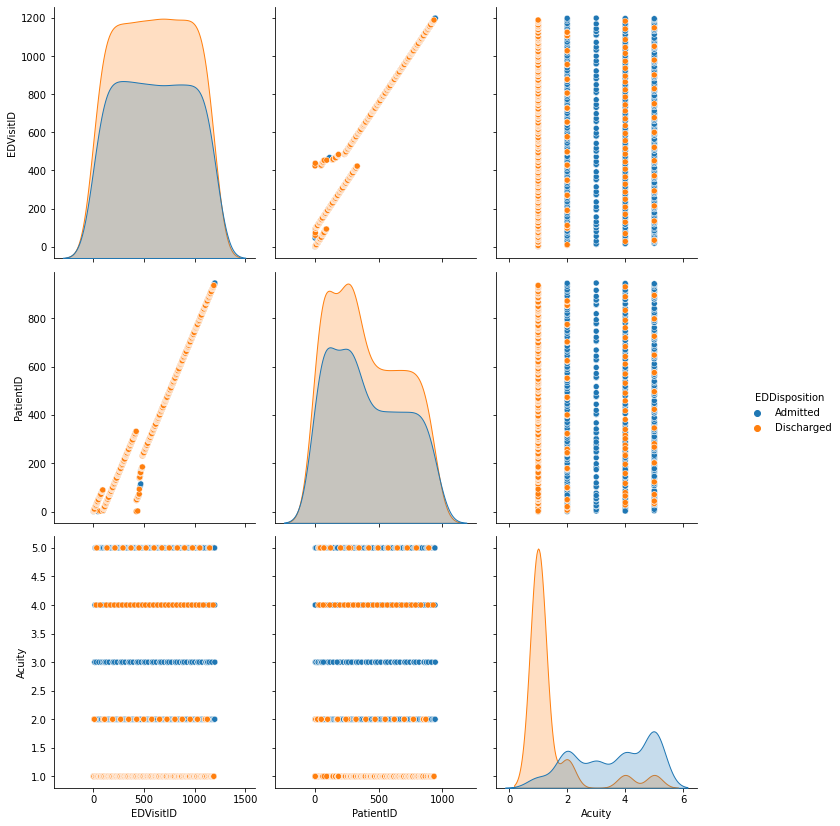

In [68]:
g=sns.pairplot(df_EDVisits,hue='EDDisposition')
g.fig.set_size_inches(12,12)

# Q8:Create a bar chart between expectedLOS & Primary diagnosis

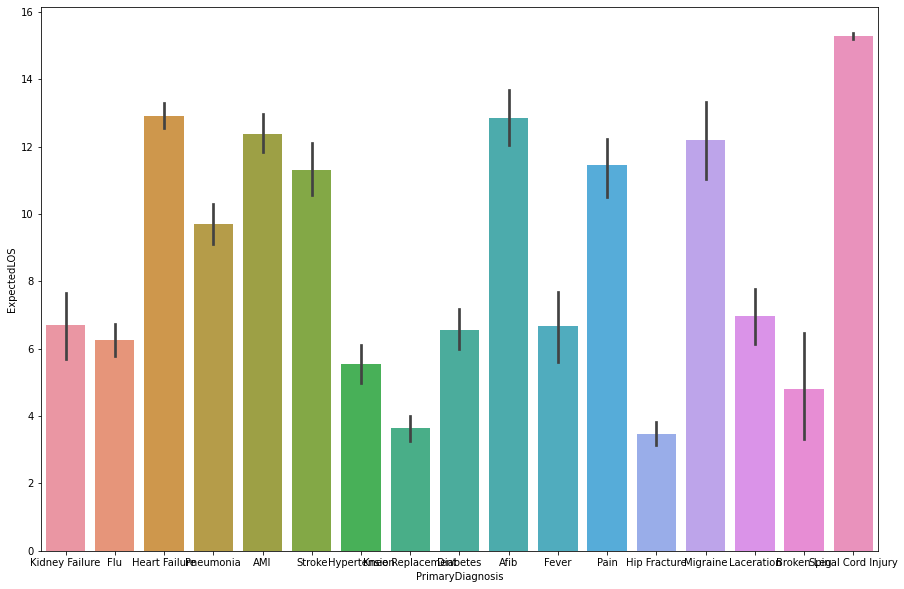

In [69]:
df_ReAdmissionRegistry.head()
plt.figure(figsize=(15,10))
ax=sns.barplot(x='PrimaryDiagnosis',y='ExpectedLOS',data=df_ReAdmissionRegistry)


# Q9:Get the list of patient ids which are not there in ReadmissionRegistry

In [70]:
merged = df_Patients.merge(df_ReAdmissionRegistry, how='left', indicator=True)
merged.loc[merged['_merge']=='left_only','PatientID'].tolist()

[4,
 135,
 145,
 189,
 200,
 224,
 234,
 374,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 414,
 501,
 562,
 599,
 690,
 691,
 704,
 726,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 871,


# Q10:Create a boxplot on ExpectedLOS by taking service into account

<AxesSubplot:title={'center':'ExpectedLOS'}, xlabel='Service'>

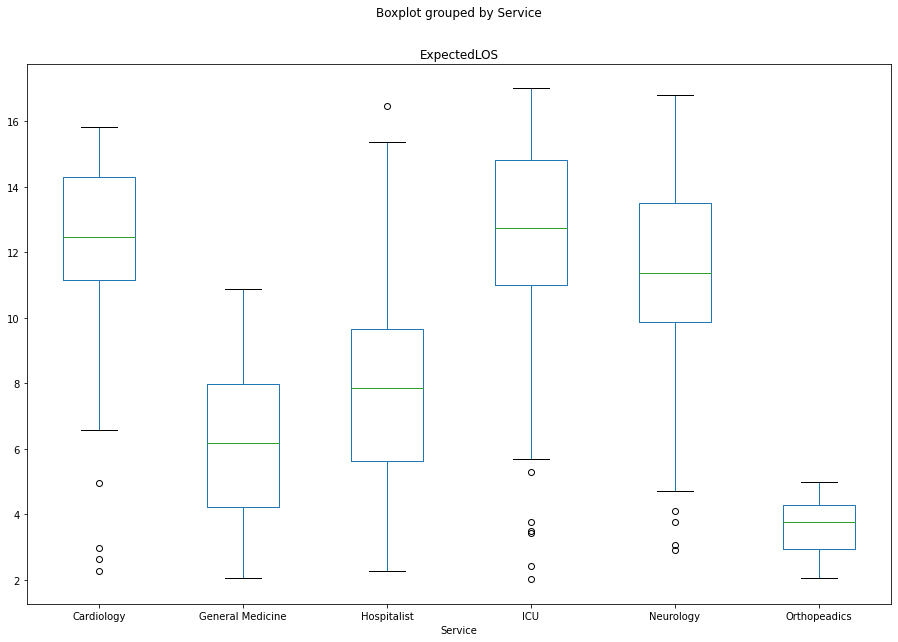

In [71]:
df_Discharges.boxplot(by ='Service', column =['ExpectedLOS'], grid = False,figsize=(15,10))

# Q11:Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

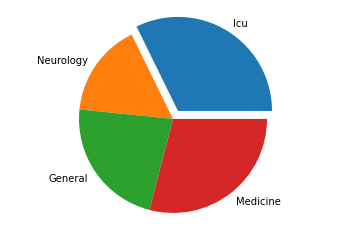

In [72]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]

#exploding the wedge with highest LOS
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots()

#creating pie chart
ax1.pie(ExpectedLOS,explode=explode,labels=Service)
ax1.axis('equal')  
plt.show()

# Q12:Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T

In [78]:
# IMPORT THE SQALCHEMY LIBRARY's CREATE_ENGINE METHOD
from sqlalchemy import create_engine

# DEFINE THE DATABASE CREDENTIALS
user = 'root'
password = 'postgres'
host = '127.0.0.1'
port = 5432
database = 'postgres'

# PYTHON FUNCTION TO CONNECT TO THE POSTGRESQL DATABASE AND
# RETURN THE SQLACHEMY ENGINE OBJECT

def get_connection():
	return create_engine(
		url="postgresql://{0}:{1}@{2}:{3}/{4}".format(
			user, password, host, port, database
		)
	)


if __name__ == '__main__':

	try:
		# GET THE CONNECTION OBJECT (ENGINE) FOR THE DATABASE
		engine = get_connection()
		print(
			f"Connection to the {host} for user {user} created successfully.")
	except Exception as ex:
		print("Connection could not be made due to the following error: \n", ex)
        
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
mysql("SELECT * FROM df_Providers where ProviderName like 'T%'")



Connection to the 127.0.0.1 for user root created successfully.


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299000
1,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539000
2,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211000
3,19,Tyler Conner,Cardiology,2003-07-09 02:41:40.410000
4,34,Tony Creed,PrimaryCare,2010-04-28 14:11:26.802000
5,37,Trent Tye,PrimaryCare,2013-01-12 15:32:21.137000


# Q13:Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

<Figure size 432x288 with 0 Axes>

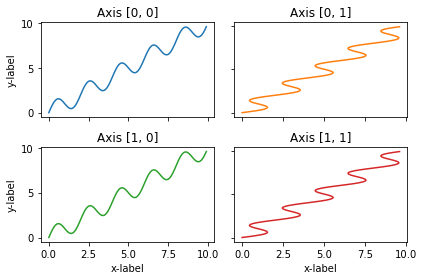

In [74]:
#SOLUTION 1 
#When stacking in two directions, the returned axs is a 2D NumPy array. If you have to set parameters for each subplot it's handy to iterate over all subplots in a 2D grid axis.flat:.

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig=plt.figure()
fig, axis = plt.subplots(2, 2)
axis[0, 0].plot(x, y)
axis[0, 0].set_title('Axis [0, 0]')
axis[0, 1].plot(y, x, 'tab:orange')
axis[0, 1].set_title('Axis [0, 1]')
axis[1, 0].plot(x, y, 'tab:green')
axis[1, 0].set_title('Axis [1, 0]')
axis[1, 1].plot(y, x, 'tab:red')
axis[1, 1].set_title('Axis [1, 1]')

for ax in axis.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axis.flat:
    ax.label_outer()

plt.tight_layout()


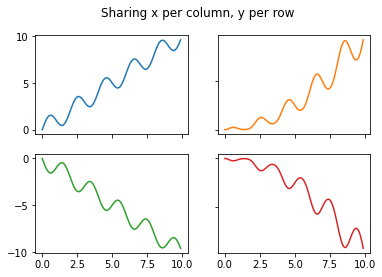

In [75]:
#SOLUTION 2
#You can use tuple-unpacking also in 2D to assign all subplots to dedicated variables:

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

# Q14:Find the number of null values in BloodPressureSystolic column

In [77]:
# Count total missing values in a dataframe , returns an integer value
print("Number of null values in BloodPressureSystolic column :",df_AmbulatoryVisits['BloodPressureSystolic'].isnull().sum())


Number of null values in BloodPressureSystolic column : 124


# Q15:Replace all the null values in ReadmissionFlag with 0

In [80]:
#SOLUTION 1
df_ReAdmissionRegistry["ReadmissionFlag"].fillna(0, inplace = True)

#SOLUTION 2
df_ReAdmissionRegistry["ReadmissionFlag"].replace(to_replace = np.nan, value = 0) 

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

# Q16:Plot a graph to show the distribution of expected length of stay

C:\Users\Arjun-Meka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


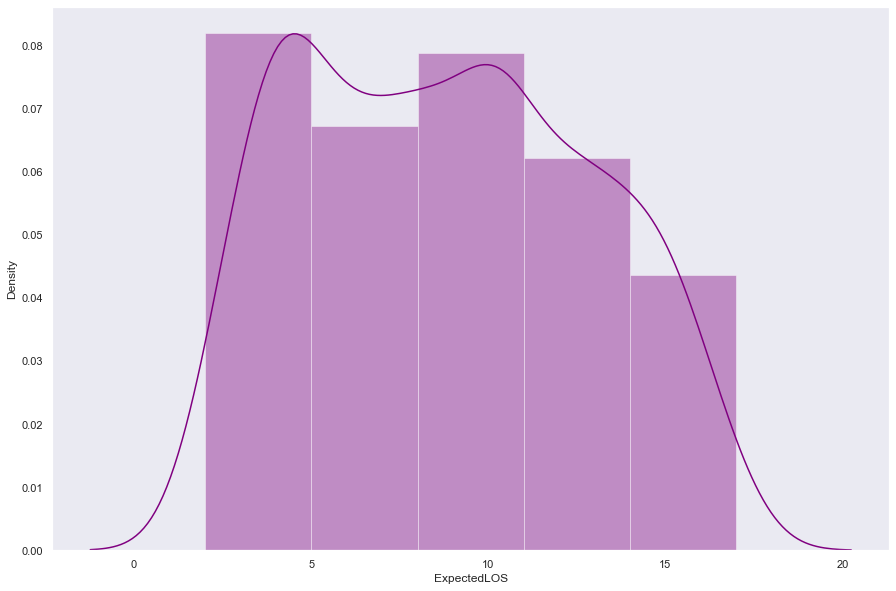

In [90]:
plt.figure(figsize=(15,10))
sns.set(style='dark',)
plot=sns.distplot(df_ReAdmissionRegistry['ExpectedLOS'],kde=True,bins=5,color='purple')
plt.show()

# Q17:Create a heat map to show the correlation between the column values of Edvisits

<AxesSubplot:>

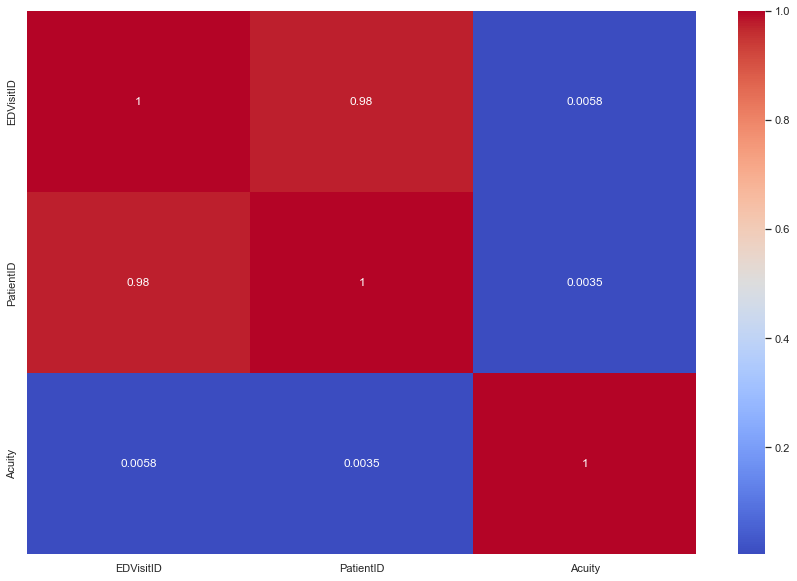

In [91]:
plt.figure(figsize=(15,10))
ed_corr=df_EDVisits.corr()
ed_corr
sns.heatmap(ed_corr,annot=True,cmap='coolwarm')

# Q18 Add column 'Age' in Patient table

In [99]:
Patients=df_Patients.copy()
  
#seperating date and time components
Patients['new_DateOfBirth'] = [d.date() for d in Patients['DateOfBirth']]
Patients['new_TimeOfBirth'] = [d.time() for d in Patients['DateOfBirth']]

#estimating age from date of birth
now = pd.Timestamp('now')
Patients['new_DateOfBirth'] = pd.to_datetime(Patients['new_DateOfBirth'], format="%Y-%m-%d")   
Patients['new_DateOfBirth'] = Patients['new_DateOfBirth'].where(Patients['new_DateOfBirth'] < now, Patients['new_DateOfBirth'] -  np.timedelta64(100, 'Y'))   
Patients['age'] = (now - Patients['new_DateOfBirth']).astype('<m8[Y]') 
Patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,new_DateOfBirth,new_TimeOfBirth,age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01,00:00:00,62.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15,02:08:42.090000,36.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15,02:52:09.762000,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15,03:32:13.635000,53.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01,19:12:58.950000,60.0


# Q19:Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [100]:
df_ReAdmissionRegistry["DischargeDate"] = pd.to_datetime(df_ReAdmissionRegistry["DischargeDate"])
df_ReAdmissionRegistry["Date"] = pd.to_datetime(df_ReAdmissionRegistry["DischargeDate"],format='%Y-%m-%d').dt.date
df_ReAdmissionRegistry["Time"] = pd.to_datetime(df_ReAdmissionRegistry["DischargeDate"],format='%H:%M:%S').dt.time
df_ReAdmissionRegistry[["DischargeDate","Date","Time"]]

#SOLUTION 2
#ReAdmissionRegistry.DischargeDate = pd.to_datetime(ReAdmissionRegistry.DischargeDate)
#ReAdmissionRegistry['Date'] = [dt.date() for dt in ReAdmissionRegistry["DischargeDate"]]
#ReAdmissionRegistry['Time'] = [dt.time() for dt in ReAdmissionRegistry["DischargeDate"]]
#ReAdmissionRegistry[["DischargeDate","Date","Time"]]

#SOLUTION 3
#ReAdmissionRegistry.DischargeDate = pd.to_datetime(ReAdmissionRegistry.DischargeDate)
#ReAdmissionRegistry["Date"] = ReAdmissionRegistry["DischargeDate"].dt.date
#ReAdmissionRegistry["Time"] = ReAdmissionRegistry["DischargeDate"].dt.time
#ReAdmissionRegistry[["DischargeDate","Date","Time"]]

,DischargeDate,Date,Time
0,2018-01-04 19:59:31.391,2018-01-04,19:59:31.391000
1,2018-01-04 21:28:51.898,2018-01-04,21:28:51.898000
2,2018-01-04 22:28:23.672,2018-01-04,22:28:23.672000
3,2018-01-05 05:47:04.933,2018-01-05,05:47:04.933000
4,2018-01-05 14:18:30.029,2018-01-05,14:18:30.029000
...,...,...,...
715,2018-03-07 21:22:10.061,2018-03-07,21:22:10.061000
716,2018-03-08 02:43:18.749,2018-03-08,02:43:18.749000
717,2018-03-08 09:27:18.377,2018-03-08,09:27:18.377000
718,2018-03-10 06:06:12.068,2018-03-10,06:06:12.068000


# Q20:Count of number of patients admitted based on Primary Diagnosis and Service provided

In [101]:
#SOLUTION 1
df_ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].nunique().to_frame(name = 'Count of Patients Admitted')

Count of Patients Admitted
PrimaryDiagnosis   Service                                     
AMI                Cardiology                                40
                   Hospitalist                                1
                   ICU                                        5
                   Neurology                                  2
Afib               Cardiology                                10
                   ICU                                        1
Broken Leg         Cardiology                                 3
                   General Medicine                           3
                   Hospitalist                                3
Diabetes           General Medicine                          38
                   Hospitalist                               26
Fever              General Medicine                          13
                   Hospitalist                                3
                   ICU                                        3
Flu                Cardiology                                 2
                   General Medicine                          54
                   Hospitalist                               19
                   ICU                                        3
                   Neurology                                  2
Heart Failure      Cardiology                                39
                   ICU                                       33
                   Neurology                                  6
Hip Fracture       Orthopeadics                              23
Hypertension       General Medicine                          34
                   Hospitalist                                6
                   ICU                                        4
                   Neurology                                  5
Kidney Failure     Cardiology                                 1
                   General Medicine                          12
                   Hospitalist                                6
                   ICU                                        1
Knee Replacement   Hospitalist                                1
                   Orthopeadics                              22
Laceration         General Medicine                          21
                   Hospitalist                                7
                   ICU                                        1
Migraine           Neurology                                 12
Pain               Neurology                                  7
Pneumonia          General Medicine                          67
                   Hospitalist                               28
                   ICU                                       77
                   Neurology                                  5
Spinal Cord Injury ICU                                        2
Stroke             General Medicine                          20
                   Hospitalist                                1
                   ICU                                       21
                   Neurology                                 26

In [103]:
#SOLUTION 2
df_ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].size().to_frame(name = 'Count of Patients Admitted')

Count of Patients Admitted
PrimaryDiagnosis   Service                                     
AMI                Cardiology                                40
                   Hospitalist                                1
                   ICU                                        5
                   Neurology                                  2
Afib               Cardiology                                10
                   ICU                                        1
Broken Leg         Cardiology                                 3
                   General Medicine                           3
                   Hospitalist                                3
Diabetes           General Medicine                          38
                   Hospitalist                               26
Fever              General Medicine                          13
                   Hospitalist                                3
                   ICU                                        3
Flu                Cardiology                                 2
                   General Medicine                          54
                   Hospitalist                               19
                   ICU                                        3
                   Neurology                                  2
Heart Failure      Cardiology                                39
                   ICU                                       33
                   Neurology                                  6
Hip Fracture       Orthopeadics                              23
Hypertension       General Medicine                          35
                   Hospitalist                                6
                   ICU                                        4
                   Neurology                                  5
Kidney Failure     Cardiology                                 1
                   General Medicine                          12
                   Hospitalist                                6
                   ICU                                        1
Knee Replacement   Hospitalist                                1
                   Orthopeadics                              22
Laceration         General Medicine                          21
                   Hospitalist                                7
                   ICU                                        1
Migraine           Neurology                                 12
Pain               Neurology                                  7
Pneumonia          General Medicine                          67
                   Hospitalist                               28
                   ICU                                       77
                   Neurology                                  5
Spinal Cord Injury ICU                                        2
Stroke             General Medicine                          20
                   Hospitalist                                1
                   ICU                                       21
                   Neurology                                 26

# Q21:Which demographic patients are prone to get stroke

In [244]:
df_ReAdmissionRegistry = pd.read_excel(xls, 'ReAdmissionRegistry')

merged=pd.merge(df_ReAdmissionRegistry[df_ReAdmissionRegistry.PrimaryDiagnosis=='Stroke'],df_Patients,how="left",on="PatientID")
merged.groupby(["Gender","Race","Language"]).size().sort_values(ascending=False).reset_index()



,Gender,Race,Language,0
0,Male,Black/African-American,English,18
1,Female,Black/African-American,English,14
2,Female,White,English,12
3,Female,White,Spanish,7
4,Male,White,English,7
5,Male,Black/African-American,Spanish,5
6,Female,Black/African-American,Spanish,3
7,Male,White,Spanish,2


# Q22:Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value

In [107]:
EDVisits_new = df_EDVisits.set_index(['Acuity','EDDisposition'])
#SOLUTION 1
EDVisits_new.groupby(['Acuity','EDDisposition'])['PatientID'].count()
#SOLUTION 2
EDVisits_new.groupby(level=[0,1])["PatientID"].count().to_frame(name = 'Number of Patients')

Number of Patients
Acuity EDDisposition                    
1      Admitted                       32
       Discharged                    558
2      Admitted                      116
       Discharged                     66
3      Admitted                       81
4      Admitted                      107
       Discharged                     30
5      Admitted                      179
       Discharged                     30

# Q23:Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [109]:
def findMiddle(list):  
  Middle_index=int((len(list)/2))
  if Middle_index%2==0:
    print(list[Middle_index])
  else:
    print(list[Middle_index-1],list[Middle_index])
findMiddle([1,2,3,4,5,6,7,8,9])

5


# Q24:Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [110]:
df_EDUnique.groupby(['ReasonForVisit','EDDisposition'])['PatientID'].count()

ReasonForVisit       EDDisposition
Accident             admitted         37
Bleeding             Admitted         14
                     Discharged       11
Car Accident         Admitted         15
                     admitted          1
Chest Pain           Admitted         66
                     admitted         14
                     discharged       11
Fever                Discharged       88
                     admitted         40
                     discharged       44
Gun Shot             admitted         16
Intoxication         discharged       23
Laceration           Discharged       22
Migraine             Admitted         26
                     Discharged       31
                     admitted         15
                     discharged       44
Pneumonia            Admitted         52
                     Discharged        9
                     admitted         70
                     discharged       40
Shortness of Breath  Discharged       12
                     a

In [111]:
df_EDUnique.groupby(['ReasonForVisit','EDDisposition'])['PatientID'].count().unstack()

EDDisposition,Admitted,Discharged,admitted,discharged
ReasonForVisit,,,,
Accident,NaN,NaN,37.0,NaN
Bleeding,14.0,11.0,NaN,NaN
Car Accident,15.0,NaN,1.0,NaN
Chest Pain,66.0,NaN,14.0,11.0
Fever,NaN,88.0,40.0,44.0
Gun Shot,NaN,NaN,16.0,NaN
Intoxication,NaN,NaN,NaN,23.0
Laceration,NaN,22.0,NaN,NaN
Migraine,26.0,31.0,15.0,44.0


# Q25:Plot a graph by counting the no. of patients in each department

[Text(0, 0, 'General Medicine'),
 Text(1, 0, 'ICU'),
 Text(2, 0, 'Hospitalist'),
 Text(3, 0, 'Cardiology'),
 Text(4, 0, 'Neurology'),
 Text(5, 0, 'Orthopeadics')]

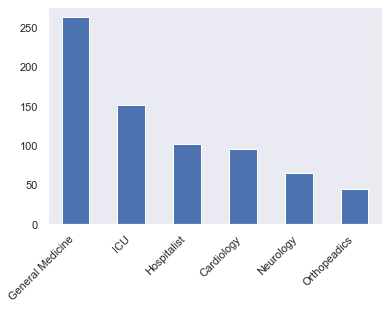

In [112]:
chart = df_Discharges["Service"].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Q26:Using Arrays and Loops, find the count of of patients based on gender

In [114]:
df_Patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [115]:
malecount=0
femalecount=0
for i in range(len(df_Patients.PatientID)):
  gender=df_Patients[df_Patients.PatientID==df_Patients.PatientID[i]]['Gender'].item()
  if gender=='Male':
    malecount+=1
  else:
    femalecount+=1

In [116]:
malecount,femalecount

(537, 408)

# Q27:Plot a graph to count the patients based on discharge disposition

[Text(0, 0, 'Home'), Text(1, 0, 'Expired'), Text(2, 0, 'Transfer')]

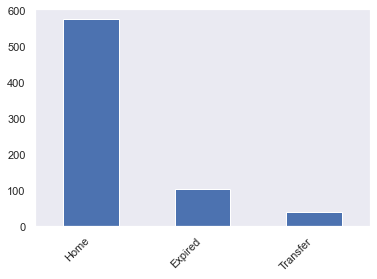

In [117]:
chart = df_Discharges["DischargeDisposition"].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Q28:Which reason of visit has maximum mortality rate

In [118]:
df_Discharges.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468


In [119]:
df_Discharges[df_Discharges.ExpectedMortality==df_Discharges.ExpectedMortality.max()]['PrimaryDiagnosis']

88    Pneumonia
Name: PrimaryDiagnosis, dtype: object

# Q29:Calculate average LOS

In [120]:
df_Discharges.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468


In [121]:
df_Discharges.DischargeDate=pd.to_datetime(df_Discharges.DischargeDate)
df_Discharges.AdmissionDate=pd.to_datetime(df_Discharges.AdmissionDate)

In [122]:
df_Discharges['LOS']=df_Discharges.DischargeDate-df_Discharges.AdmissionDate
df_Discharges.LOS.mean().days

10

# Q30:Which patientid has most entries in readmission registry

In [123]:
df_ReAdmissionRegistry.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Date,Time
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN,2018-01-04,19:59:31.391000
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2018-01-04,21:28:51.898000
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,2018-01-04,22:28:23.672000
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-05,05:47:04.933000
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN,2018-01-05,14:18:30.029000


In [124]:
df_ReAdmissionRegistry.groupby('PatientID').size().sort_values(ascending=False).head(1)

PatientID
23    3
dtype: int64

# Q31:Find count of White Spanish Male

In [126]:
df_Patients.head()
df_Patients[(df_Patients.Gender=='Male') & (df_Patients.Language=='Spanish') & (df_Patients.Race=='White')]['PatientID'].count()

15

# Q32:Write a function to print the table of the given number

In [127]:
num = 5

for count in range(1, 11):
    print(num, 'x', count, '=', num * count)

5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
5 x 10 = 50


# Q33:Using a bar chart, which Service had the lowest count of Expected Mortality?

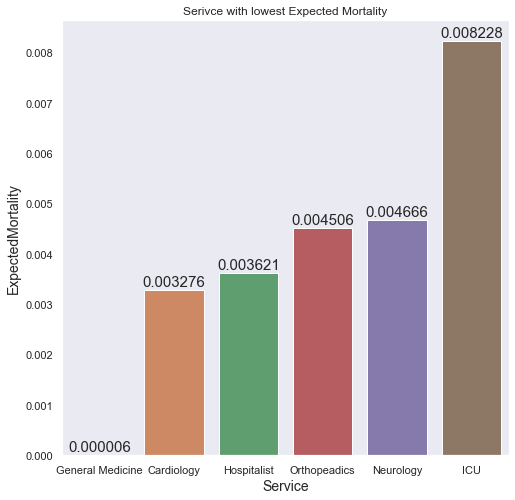

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

#to get the minimum/lowest values for each service
df_EMor= df_Discharges[df_Discharges['ExpectedMortality'] == df_Discharges.groupby('Service')['ExpectedMortality'].transform('min')]
#to reset the index
df_reset=df_EMor.reset_index(drop=True)
df_sorted= df_reset.sort_values('ExpectedMortality')

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
plots = sns.barplot(x="Service", y="ExpectedMortality", data=df_sorted)
 
# Iterrating over the bars one by one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
    plots.annotate(format(bar.get_height(), '.6f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    # Setting the label for x-axis
plt.xlabel("Service", size=14)
 
# Setting the label for y-axis
plt.ylabel("ExpectedMortality", size=14)
 
# Setting the title for the graph
plt.title("Serivce with lowest Expected Mortality")
# Finally showing the plot
plt.show()

#the Answer is "General Medicine"

# Q34:np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [129]:
y=np.arange(1,31).reshape(6,5)
y[2:4, 0:2]

array([[11, 12],
       [16, 17]])

# Q35:np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [130]:
diag=np.arange(1,31).reshape(6,5)
np.diag(diag,k=1)

array([ 2,  8, 14, 20])

# Q36:Create a correlation matrix on EDVisits

In [131]:
df_EDVisits.head()

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted


In [132]:
df_EDVisits.corr()

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


<AxesSubplot:>

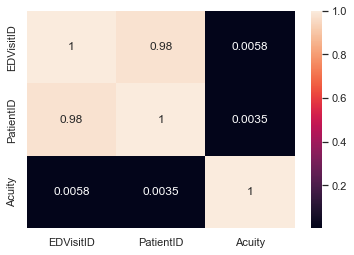

In [133]:
corrMatrix = df_EDVisits.corr()
sns.heatmap(corrMatrix, annot=True)


# Q37:Write a function to print all the upper case letter of a given sentence

In [134]:
# user input
test_str=input("Enter a sentence")
  
# printing the inputted sentence
print("The sentence entered is : " + str(test_str))
  
# Extract Upper Case Characters

res = list(filter(lambda c: c.isupper(), test_str))
  
# printing result 
print("The uppercase characters in the sentence are : " + str(res))

Enter a sentencenumpynInJA Is AwEsome
The sentence entered is : numpynInJA Is AwEsome
The uppercase characters in the sentence are : ['I', 'J', 'A', 'I', 'A', 'E']


# Q38: Number of patients on 'Transfer' based on primary diagnosis

In [135]:
df_ReAdmissionRegistry.head()
df_ReAdmissionRegistry.groupby(['PrimaryDiagnosis']).apply(lambda x: x[x['DischargeDisposition'] == 'Transfer' ]['DischargeDisposition'].count())

PrimaryDiagnosis
AMI                   0
Afib                  1
Broken Leg            0
Diabetes              7
Fever                 0
Flu                   2
Heart Failure         9
Hip Fracture          0
Hypertension          0
Kidney Failure        0
Knee Replacement      1
Laceration            1
Migraine              0
Pain                  1
Pneumonia             8
Spinal Cord Injury    0
Stroke                9
dtype: int64

# Q39:Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit

In [136]:
result = pd.merge(df_EDUnique, df_Patients, on='PatientID')
result.head()
df_all=result.loc[result['ReasonForVisit']=='Migraine',['PatientID','FirstName','LastName','DateOfBirth','ReasonForVisit']]
df_all.sort_values('PatientID').reset_index(drop=True)

,PatientID,FirstName,LastName,DateOfBirth,ReasonForVisit
0,2,Far,Myers,1985-11-15 02:08:42.090,Migraine
1,3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
2,12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
3,14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
4,22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...,...
111,897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
112,908,Knox,Group,1975-08-25 22:27:50.177,Migraine
113,910,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
114,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


# Q40:Plot a graph showing the count of patients for the reason visited the hospital.

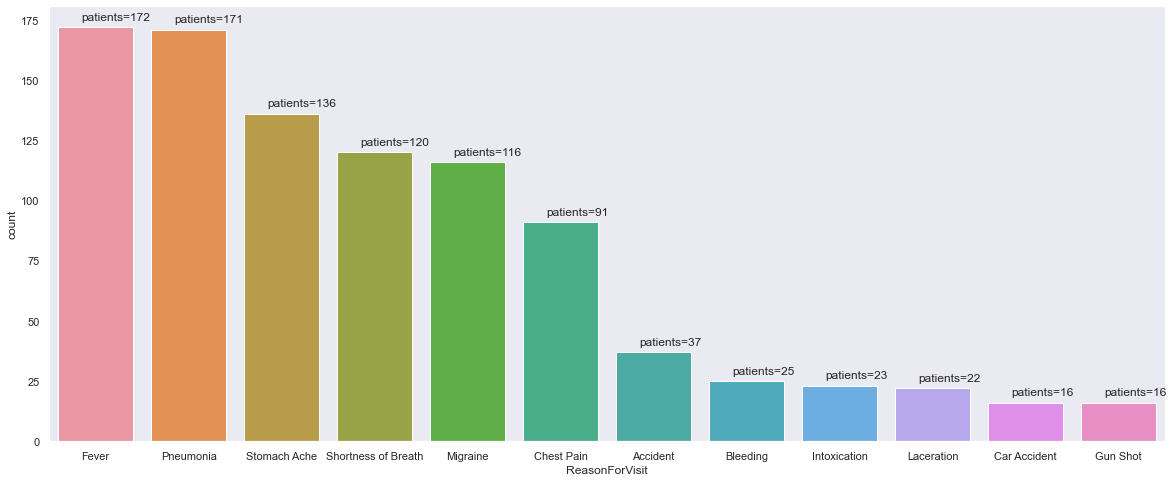

In [137]:

import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,8))
# count plot on single categorical variable
ax=sns.countplot(x=df_EDUnique['ReasonForVisit'],data = df_EDUnique,order=df_EDUnique['ReasonForVisit'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, 'patients=%.0f'%(height))
# Show the plot
plt.show()


# Q41:Find the visit type with maximum 'No Show'

In [138]:
df_AmbulatoryVisits.groupby(['VisitType']).apply(lambda x: x[x['VisitStatus'] == 'No Show' ]['VisitStatus'].count()).idxmax()

'Telemedicine'

# Q42:Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery

In [139]:
df_Providers.loc[(df_Providers['ProviderID'].between(12,19))&(df_Providers['ProviderSpecialty']=='Surgery')] 

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


# Q43:Write a regular expression to find all the digits and numbers in the string

In [140]:
import re
str="We are Team Pythonistas consisting of 4 members . We are participating in Python Hackathon from 05/17/2022 to 05/24/2022 !! We are going to come 1st !"
#search using regex
x = re.findall('[0-9]+', str)
print("All digits and numbers in the string are: ",x)

All digits and numbers in the string are:  ['4', '05', '17', '2022', '05', '24', '2022', '1']


# Q44:Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [245]:
df_ReAdmissionRegistry = pd.read_excel(xls, 'ReAdmissionRegistry')
#convert columns to datetime
df_ReAdmissionRegistry[["AdmissionDate","DischargeDate"]] = df_ReAdmissionRegistry[["AdmissionDate","DischargeDate"]].apply(pd.to_datetime)
#calculate difference between dates
df_ReAdmissionRegistry['Length_of_Stay']=(df_ReAdmissionRegistry["DischargeDate"] - df_ReAdmissionRegistry["AdmissionDate"]) / np.timedelta64(1, 'D')
# Creates a pivot table dataframe
pd.pivot_table(df_ReAdmissionRegistry, index =['Service','PrimaryDiagnosis'], values ='Length_of_Stay',aggfunc = 'mean')


Length_of_Stay
Service          PrimaryDiagnosis                  
Cardiology       AMI                      10.743253
                 Afib                     11.696580
                 Broken Leg               10.947355
                 Flu                      12.422469
                 Heart Failure             9.939645
                 Kidney Failure            4.677856
General Medicine Broken Leg               13.251505
                 Diabetes                 10.836104
                 Fever                     8.469869
                 Flu                      10.418172
                 Hypertension              9.487165
                 Kidney Failure           11.190868
                 Laceration                9.951947
                 Pneumonia                 9.884497
                 Stroke                   11.760999
Hospitalist      AMI                      10.021201
                 Broken Leg                8.276967
                 Diabetes                  9.323806
                 Fever                    10.910405
                 Flu                       9.211840
                 Hypertension             11.330291
                 Kidney Failure           10.610999
                 Knee Replacement          6.694655
                 Laceration                9.567508
                 Pneumonia                 9.451372
                 Stroke                   16.592635
ICU              AMI                      12.624681
                 Afib                      6.929579
                 Fever                    13.924556
                 Flu                       8.409505
                 Heart Failure             9.941685
                 Hypertension              8.836639
                 Kidney Failure           11.564725
                 Laceration               15.290830
                 Pneumonia                 8.739771
                 Spinal Cord Injury       10.587850
                 Stroke                   10.930269
Neurology        AMI                       9.328957
                 Flu                       7.803995
                 Heart Failure            13.615608
                 Hypertension              9.775038
                 Migraine                  9.013517
                 Pain                     10.894707
                 Pneumonia                10.173193
                 Stroke                   10.013667
Orthopeadics     Hip Fracture              9.730941
                 Knee Replacement          9.911915

# Q45:Calculate mortality by diagnosis

In [142]:
df_ReAdmissionRegistry = df_ReAdmissionRegistry[df_ReAdmissionRegistry["DischargeDisposition"] == 'Expired']
df_ReAdmissionRegistry.groupby(["PrimaryDiagnosis","DischargeDisposition"])["PatientID"].count().to_frame(name = 'Mortality')

,,Mortality
PrimaryDiagnosis,DischargeDisposition,
AMI,Expired,6
Afib,Expired,4
Broken Leg,Expired,3
Diabetes,Expired,9
Fever,Expired,4
Flu,Expired,11
Heart Failure,Expired,16
Hip Fracture,Expired,3
Hypertension,Expired,16


# Q46:Write a code to split a sentence into words using regex

In [143]:
sentence = "Team Pythonistas rocks"
words = re.findall(r'[A-Za-z]+|[^A-Za-z ]', sentence)
words

['Team', 'Pythonistas', 'rocks']

# Q47:Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

In [145]:
#SOLUTION 1 USING LOC
df_AmbulatoryVisits.loc[df_AmbulatoryVisits['BloodPressureSystolic'].idxmax()]
#SOLUTION 2
df_AmbulatoryVisits[df_AmbulatoryVisits.BloodPressureSystolic== df_AmbulatoryVisits.BloodPressureSystolic.max()]
#SOLUTION 3
df_AmbulatoryVisits.loc[(df_AmbulatoryVisits['BloodPressureSystolic']).max()]


VisitID                                          167
PatientMRN                                       805
ProviderID                                        29
DateofVisit                      2019-02-12 00:00:00
DateScheduled             2019-02-06 21:47:15.328000
VisitDepartmentID                                 11
VisitType                                  Follow Up
BloodPressureSystolic                            NaN
BloodPressureDiastolic                           NaN
Pulse                                            NaN
VisitStatus                                Completed
Name: 190, dtype: object

# Q48:Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [246]:
#convert columns to datetime
df_ReAdmissionRegistry[["AdmissionDate","DischargeDate"]] = df_ReAdmissionRegistry[["AdmissionDate","DischargeDate"]].apply(pd.to_datetime)
#calculate difference between dates
df_ReAdmissionRegistry['diff_days']=(df_ReAdmissionRegistry["DischargeDate"] - df_ReAdmissionRegistry["AdmissionDate"]) / np.timedelta64(1, 'D')
df_ReAdmissionRegistry.groupby(['Service','DischargeDisposition'])['diff_days'].mean().to_frame(name = 'Average LOS')

Average LOS
Service          DischargeDisposition             
Cardiology       Expired                  9.357828
                 Home                    10.633869
                 Transfer                11.759865
General Medicine Expired                  8.972359
                 Home                    10.298306
                 Transfer                11.075935
Hospitalist      Expired                 10.587996
                 Home                     9.522124
                 Transfer                 9.248801
ICU              Expired                  9.790686
                 Home                     9.575618
                 Transfer                 9.479894
Neurology        Expired                 10.650761
                 Home                     9.677446
                 Transfer                12.261288
Orthopeadics     Expired                 12.327644
                 Home                     9.325017
                 Transfer                16.559908

# Q49:Create a jointplot between expected mortality & expected length of stay

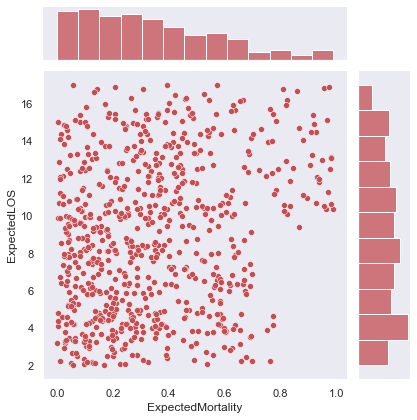

In [150]:
sns.jointplot(x='ExpectedMortality', y='ExpectedLOS', data=df_Discharges,color='r')

# Q50:Which departmentID has maximum number of visits scheduled.

In [248]:
df_AmbulatoryVisits.head()
df_AmbulatoryVisits['VisitDepartmentID'].value_counts().head(1)


#departmentID 11 has maximum number of visits

11    102
Name: VisitDepartmentID, dtype: int64

# Q51:Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [169]:
EDVisits=df_EDVisits[df_EDVisits['ReasonForVisit'].isin(['Migraine','Pneumonia']) & (df_EDVisits.Acuity >=2)]
df_inner = pd.merge(df_Patients, EDVisits, on='PatientID', how='inner')
df_inner

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,55,2020-01-01 15:01:29.846,2020-01-01 23:11:53.864,3,Migraine,Admitted
1,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,98,2020-01-02 01:33:47.283,2020-01-02 11:36:20.129,2,Migraine,Discharged
2,8,Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English,8,2020-01-01 01:15:35.564,2020-01-02 00:07:24.636,2,Migraine,Discharged
3,10,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,10,2020-01-01 02:02:03.160,2020-01-01 08:28:27.128,2,Migraine,Discharged
4,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,913,Alta,McGrath,1973-02-09 04:11:58.220,Female,Black/African-American,English,1167,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
211,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Female,Black/African-American,English,1169,2020-01-15 05:30:02.889,2020-01-15 18:47:12.044,3,Migraine,Admitted
212,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,1170,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted
213,917,Velvet,Bushnell,1965-11-13 07:26:58.889,Female,Black/African-American,English,1171,2020-01-15 06:27:24.353,2020-01-15 10:16:03.795,2,Pneumonia,Admitted


# Q52:Retrieve the row with minimum DBP using sorting technique

In [170]:
#SOLUTION 1 using sorting technique
df_AmbulatoryVisits.sort_values(by=['BloodPressureDiastolic']).head(1)

#SOLUTION 2 using min function 
#df_AmbulatoryVisits[df_AmbulatoryVisits.BloodPressureDiastolic == df_AmbulatoryVisits.BloodPressureDiastolic.min()]


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


# Q53:Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

In [256]:
df_EDVisits = pd.read_excel(xls, 'EDVisits')
Reason_For_Visit = input("Enter the Reason For Visit : ").capitalize()
len(df_EDVisits[df_EDVisits.ReasonForVisit==Reason_For_Visit])

Enter the Reason For Visit : Fever


234

# Q54:Mortality O.E

In [251]:
r_new=df_ReAdmissionRegistry[df_ReAdmissionRegistry["DischargeDisposition"]=="Expired"]
observed_mortality=len(r_new)
answer=observed_mortality / df_ReAdmissionRegistry["ExpectedMortality"].sum()
print("MORTALITY O.E. = ",answer.round(decimals = 2))


MORTALITY O.E. =  0.43


# Q55:Create a bar chart on service & expected length of stay

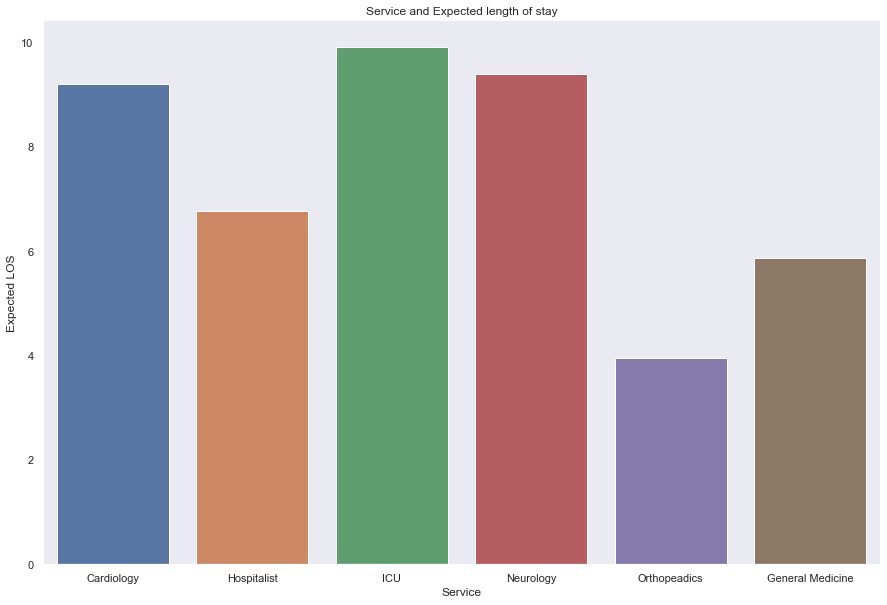

In [176]:
plt.figure(figsize=(15,10))
sns.barplot(x='Service',y='ExpectedLOS',data=df_ReAdmissionRegistry,ci=None)
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.title('Service and Expected length of stay')
plt.xlabel('Service')
plt.ylabel('Expected LOS')
sns.despine()
plt.show()

# Q56:Count of canceled status

In [263]:
df_AmbulatoryVisits = pd.read_excel(xls, 'AmbulatoryVisits')
df_AmbulatoryVisits.head()
len(df_AmbulatoryVisits.loc[(df_AmbulatoryVisits["VisitStatus"]=='Canceled')])

60

# Q57:Find the age prone to get stroke

In [270]:
df_Patients = pd.read_excel(xls, 'Patients')
df_stroke=df_Patients.copy()
df_stroke['new_DateOfBirth'] = [d.date() for d in df_stroke['DateOfBirth']]
df_stroke['new_TimeOfBirth'] = [d.time() for d in df_stroke['DateOfBirth']]

# converting dateofbirth to ag
now = pd.Timestamp('now')
df_stroke['new_DateOfBirth'] = pd.to_datetime(df_stroke['new_DateOfBirth'], format="%Y-%m-%d")   
df_stroke['new_DateOfBirth'] = df_stroke['new_DateOfBirth'].where(df_stroke['new_DateOfBirth'] < now, df_Patient['new_DateOfBirth'] -  np.timedelta64(100, 'Y'))   
df_stroke['age'] = (now - df_stroke['new_DateOfBirth']).astype('<m8[Y]')  
df_stroke.head()
merged=pd.merge(df_ReAdmissionRegistry[df_ReAdmissionRegistry.PrimaryDiagnosis=='Stroke'],Patients,how="left",on="PatientID")
merged.groupby(['age']).size().sort_values(ascending=False).reset_index()

,age,0
0,57.0,6
1,47.0,4
2,38.0,4
3,39.0,4
4,41.0,4
5,61.0,4
6,60.0,3
7,56.0,3
8,54.0,3
9,53.0,3


# Q58:Display total count of patients service wise based on gender

In [271]:
patients_new=df_Patients.merge(df_ReAdmissionRegistry[['PatientID', 'Service']])
patients_new.groupby(['Service','Gender'])['PatientID'].count().to_frame(name = 'Count of Patients')

Count of Patients
Service          Gender                   
Cardiology       Female                 41
                 Male                   54
General Medicine Female                114
                 Male                  149
Hospitalist      Female                 35
                 Male                   66
ICU              Female                 65
                 Male                   86
Neurology        Female                 34
                 Male                   31
Orthopeadics     Female                 22
                 Male                   23

# Q59:Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [272]:
Providers_new=pd.DataFrame()
Providers_new[['First Name', 'Last Name']] = df_Providers['ProviderName'].str.split(' ', 1, expand=True)
Providers_new

,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


# Q60:Predict the output of the program..
class Acc: 
def __init__(self, id): 
self.id = id
id = 555 

acc = Acc(111) 
print(acc.id)


OUTPUT will be 111.

We are creating an instance of class Acc. Inside the class we are defining the init 
function which initialises the attribute id to the value passed in the function as a parameter.
It then initialises the value of the variable id and lastly,prints the value in the putput.

# Q61:Plot a graph by multiplotting on the same canvas . (Take any set of x & y values)

<AxesSubplot:xlabel='Service', ylabel='ExpectedMortality'>

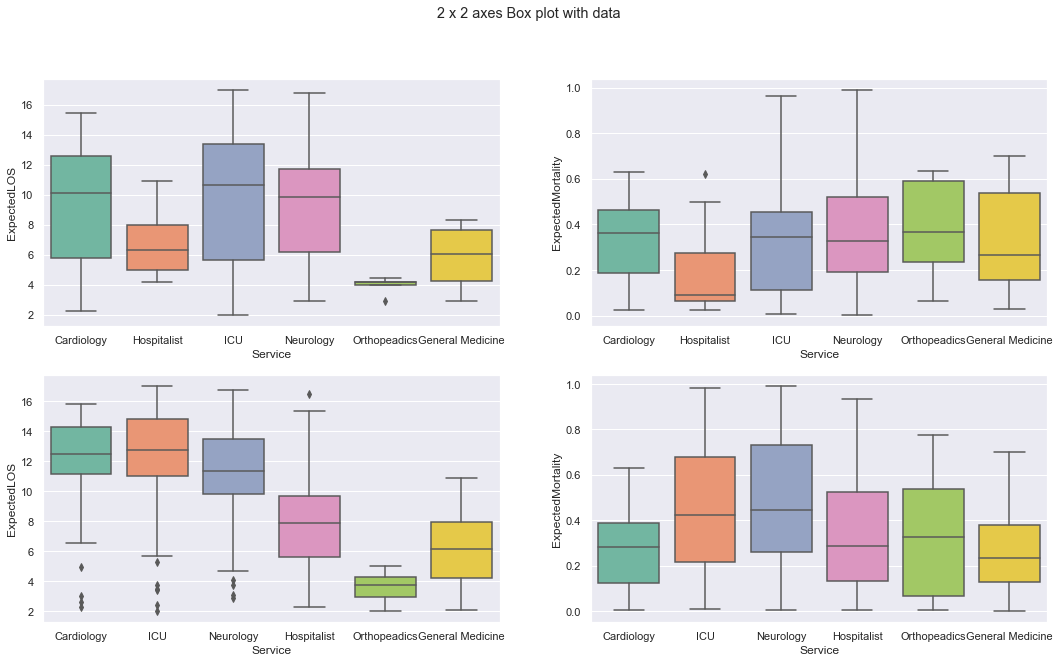

In [196]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('2 x 2 axes Box plot with data')
 
sns.boxplot(ax=axes[0, 0], data=df_ReAdmissionRegistry, x='Service', y='ExpectedLOS')
sns.boxplot(ax=axes[0, 1], data=df_ReAdmissionRegistry, x='Service', y='ExpectedMortality')
sns.boxplot(ax=axes[1, 0], data=df_Discharges, x='Service', y='ExpectedLOS')
sns.boxplot(ax=axes[1, 1], data=df_Discharges, x='Service', y='ExpectedMortality')


# Q62:Display the data for all 'White Female' patients above the age of 50

In [273]:
df_Patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [278]:
# from datetime import datetime, date
# df_female=df_Patients.copy()
# def age(born):
#     born = datetime.strptime(born, "%m/%d/%Y").date()
#     today = date.today()
#     return today.year - born.year - ((today.month, 
#                                       today.day) < (born.month, 
#                                                     born.day))
  
# df_female['Age'] = df_female['DateOfBirth'].apply(age)

df_Patients['new_DateOfBirth'] = [d.date() for d in df_Patients['DateOfBirth']]
df_Patients['new_TimeOfBirth'] = [d.time() for d in df_Patients['DateOfBirth']]

# converting dateofbirth to ag
now = pd.Timestamp('now')
df_Patients['new_DateOfBirth'] = pd.to_datetime(df_Patients['new_DateOfBirth'], format="%Y-%m-%d")   
df_Patients['new_DateOfBirth'] = df_Patients['new_DateOfBirth'].where(df_Patients['new_DateOfBirth'] < now, df_Patients['new_DateOfBirth'] -  np.timedelta64(100, 'Y'))   
df_Patients['age'] = (now - df_Patients['new_DateOfBirth']).astype('<m8[Y]') 
df_Patients[(df_Patients.Gender=='Female')&(df_Patients.Race=='White')&(df_Patients.age>50)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,new_DateOfBirth,new_TimeOfBirth,age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,1967-12-09,05:01:37.892000,54.0
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,1960-10-08,01:42:51.212000,61.0
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,1960-11-28,18:05:11.459000,61.0
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,1966-04-14,06:01:07.169000,56.0
44,45,Barret,Doubrava,1962-10-18 08:23:23.478,Female,White,Spanish,1962-10-18,08:23:23.478000,59.0
...,...,...,...,...,...,...,...,...,...,...
864,865,Giovanni,Borland,1960-12-01 13:16:18.100,Female,White,English,1960-12-01,13:16:18.100000,61.0
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,1970-12-09,04:49:48.933000,51.0
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,1967-03-10,08:18:47.908000,55.0
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,1969-08-15,11:05:30.165000,52.0


# Q63:Using loc, retrieve the firstname and lastname of patients between indices 101 and 200

In [279]:
df_Patients.loc[101:200,['FirstName','LastName']]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# Q64:Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)

In [201]:
a=np.arange(6).reshape(2,3) 

In [206]:
b=np.arange(6).reshape(3,2) 

In [207]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [208]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [209]:
np.matmul(a, b)

array([[10, 13],
       [28, 40]])

# Q65:Get the count of number of patients based on service and primary diagnosis

In [210]:
df_Discharges.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LOS
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,6 days 18:06:06.408000
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days 02:59:04.667000
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days 16:16:06.782000
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,8 days 04:48:33.134000
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days 13:32:36.157000


In [211]:
df_Discharges.groupby(['Service','PrimaryDiagnosis']).size().reset_index()

,Service,PrimaryDiagnosis,0
0,Cardiology,AMI,40
1,Cardiology,Afib,10
2,Cardiology,Broken Leg,3
3,Cardiology,Flu,2
4,Cardiology,Heart Failure,39
5,Cardiology,Kidney Failure,1
6,General Medicine,Broken Leg,3
7,General Medicine,Diabetes,38
8,General Medicine,Fever,13
9,General Medicine,Flu,54


# Q66:np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30

In [212]:
np.arange(1,31).reshape(6,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [213]:
arr=np.arange(1,31).reshape(6,5)

In [214]:
arr[[0,4,5],-2:]

array([[ 4,  5],
       [24, 25],
       [29, 30]])

# Q67:Make a pivot table by counts the no. of patients from the admission date till discharge date

In [215]:
df_Discharges.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LOS
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,6 days 18:06:06.408000
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days 02:59:04.667000
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days 16:16:06.782000
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,8 days 04:48:33.134000
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days 13:32:36.157000


In [281]:
grouped=df_Discharges.groupby(['AdmissionDate','DischargeDate']).size().to_frame(name = 'patientcount').reset_index()
grouped.head()

,AdmissionDate,DischargeDate,patientcount
0,2018-01-01,2018-01-04 19:59:31.391,1
1,2018-01-01,2018-01-04 21:28:51.898,1
2,2018-01-01,2018-01-04 22:28:23.672,1
3,2018-01-01,2018-01-05 05:47:04.933,1
4,2018-01-01,2018-01-05 14:18:30.029,1


In [282]:
grouped.pivot_table('patientcount', index='AdmissionDate', columns='DischargeDate')

DischargeDate,2018-01-04 19:59:31.391,2018-01-04 21:28:51.898,2018-01-04 22:28:23.672,2018-01-05 02:40:20.756,2018-01-05 05:47:04.933,2018-01-05 14:18:30.029,2018-01-06 13:01:00.276,2018-01-07 03:01:21.623,2018-01-07 03:35:49.426,2018-01-07 15:39:25.987,...,2018-03-08 00:24:13.535,2018-03-08 02:43:18.749,2018-03-08 09:17:08.227,2018-03-08 09:27:18.377,2018-03-08 12:58:46.999,2018-03-09 00:57:07.978,2018-03-09 07:07:45.088,2018-03-09 07:37:01.872,2018-03-10 06:06:12.068,2018-03-10 20:38:30.568
AdmissionDate,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q68:Display the data where actual LOS is greater than expected LOS

In [218]:
df_Discharges.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LOS
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,6 days 18:06:06.408000
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days 02:59:04.667000
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days 16:16:06.782000
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,8 days 04:48:33.134000
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days 13:32:36.157000


In [219]:
df_Discharges.LOS[0].days

6

In [220]:
df_Discharges.LOS=df_Discharges.LOS.apply(lambda td: td.days)

In [221]:
df_Discharges[df_Discharges.LOS>df_Discharges.ExpectedLOS]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13


# Q69:Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive

In [222]:
df_Patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [223]:
df_Patients.loc[(df_Patients['FirstName'].str.contains("lau", case=False))|(df_Patients['LastName'].str.contains("lau", case=False))]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


# Q70:Plot a graph to show the distribution of expected mortality

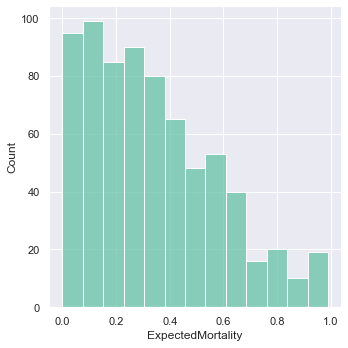

In [224]:
sns.displot(df_Discharges, x="ExpectedMortality")

# Q71:Create a visualization on the count the no. of patients based on primary diagnosis

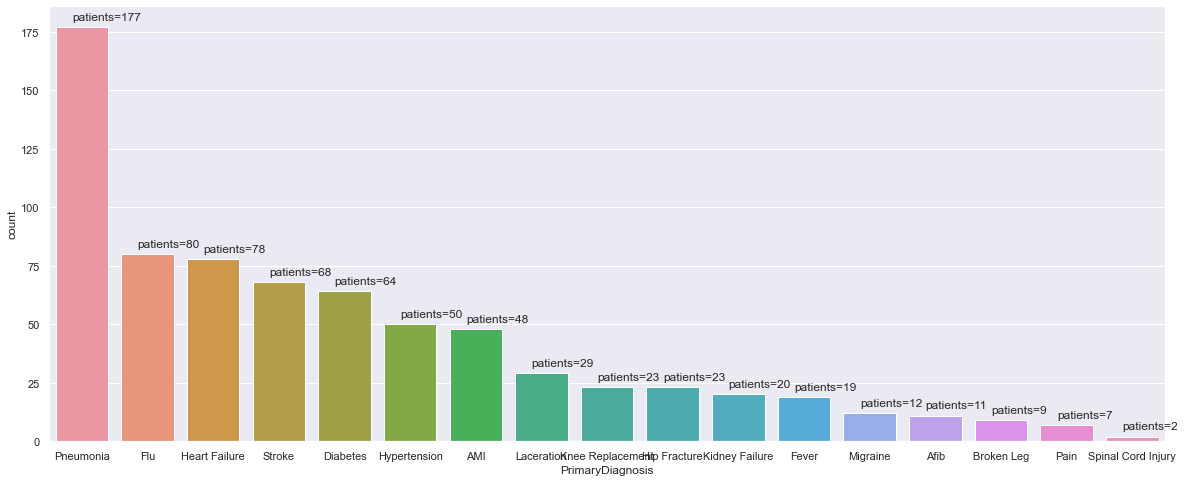

In [225]:
df_Discharges.head()
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,8))
# count plot on primary diagnosis
ax=sns.countplot(x=df_Discharges['PrimaryDiagnosis'],data = df_Discharges,order=df_Discharges['PrimaryDiagnosis'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, 'patients=%.0f'%(height))
# Show the plot
plt.show()

# Q72:List male patients over the age of 60 who have undergone surgery from January-March 2019

In [226]:
from datetime import datetime, date

#merging AmbulatoryVisits and Providers dataframes
df_join = pd.merge(df_AmbulatoryVisits, df_Providers, on='ProviderID')
df_join.head()

#merging Patients and already merged (AmbulatoryVisits and Providers) dataframe
df_all = df_Patients.merge(df_join, how='inner', left_on='PatientID', right_on='PatientMRN')
#extracting only relevant features
df_all=df_all[['PatientID','PatientMRN','DateOfBirth','DateofVisit','Gender','DateScheduled','VisitType','VisitStatus','ProviderName']]

#seperating date and time components
df_all['new_DateOfBirth'] = [d.date() for d in df_all['DateOfBirth']]
df_all['new_TimeOfBirth'] = [d.time() for d in df_all['DateOfBirth']]

#estimating age from date of birth
now = pd.Timestamp('now')
df_all['new_DateOfBirth'] = pd.to_datetime(df_all['new_DateOfBirth'], format="%Y-%m-%d")   
df_all['new_DateOfBirth'] = df_all['new_DateOfBirth'].where(df_all['new_DateOfBirth'] < now, df_all['new_DateOfBirth'] -  np.timedelta64(100, 'Y'))   
df_all['age'] = (now - df_all['new_DateOfBirth']).astype('<m8[Y]')   

#Extracting month and year from visitdate column
df_all['DateofVisit'] = pd.to_datetime(df_all['DateofVisit'])
df_all['DateofVisit'].dt.to_period('M')
df_all['yearmonth']=df_all['DateofVisit'].dt.strftime('%m-%Y')

#extracting all the male population who are over 60
df_male=df_all.loc[(df_all['age']>60) & (df_all['Gender']=='Male')]
df_male.loc[(df_male['yearmonth']>='01-2019') & (df_all['yearmonth']<='03-2019')].reset_index(drop=True)
  


,PatientID,PatientMRN,DateOfBirth,DateofVisit,Gender,DateScheduled,VisitType,VisitStatus,ProviderName,new_DateOfBirth,new_TimeOfBirth,age,yearmonth
0,19,19,1960-04-04 10:00:34.189,2019-01-16,Male,2018-12-17 13:57:08.056,New,Completed,Perry Pardon,1960-04-04,10:00:34.189000,62.0,01-2019
1,20,20,1960-02-10 19:04:57.032,2019-01-17,Male,2018-12-25 04:19:07.569,New,Completed,Kent Kendall,1960-02-10,19:04:57.032000,62.0,01-2019
2,560,560,1960-02-11 20:56:05.193,2019-02-22,Male,2019-01-25 13:10:02.833,Follow Up,Completed,Ted Texas,1960-02-11,20:56:05.193000,62.0,02-2019
3,581,581,1960-06-06 08:19:25.534,2019-03-01,Male,2019-02-11 07:28:05.541,Telemedicine,Completed,Kim Kimberly,1960-06-06,08:19:25.534000,61.0,03-2019
4,581,581,1960-06-06 08:19:25.534,2019-01-02,Male,2018-12-06 22:40:43.282,New,Completed,Ala Bama,1960-06-06,08:19:25.534000,61.0,01-2019
5,662,662,1960-11-12 18:08:26.260,2019-02-12,Male,2019-01-30 13:17:38.810,Telemedicine,Completed,Holly Hue,1960-11-12,18:08:26.260000,61.0,02-2019
6,662,662,1960-11-12 18:08:26.260,2019-01-29,Male,2019-01-11 13:36:59.786,Follow Up,Completed,Sally Sue,1960-11-12,18:08:26.260000,61.0,01-2019
7,662,662,1960-11-12 18:08:26.260,2019-02-18,Male,2019-02-05 04:53:06.610,Physical,No Show,Tyler Conner,1960-11-12,18:08:26.260000,61.0,02-2019
8,802,802,1961-05-19 21:00:01.885,2019-02-09,Male,2019-01-16 17:53:41.867,Follow Up,Completed,Sarah Ab,1961-05-19,21:00:01.885000,61.0,02-2019
9,802,802,1961-05-19 21:00:01.885,2019-03-01,Male,2019-02-11 12:07:20.257,Follow Up,No Show,Barry Bar,1961-05-19,21:00:01.885000,61.0,03-2019


# Q73:Delete the column 'DischargeDispostion' iteratively

In [227]:
for col in df_ReAdmissionRegistry.columns:
    if ('DischargeDisposition' in col):
        del df_ReAdmissionRegistry[col]

df_ReAdmissionRegistry.head()
     

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Date,Time,Length_of_Stay,diff_days
7,1,9,2018-01-01,2018-01-07 18:06:06.408,Cardiology,AMI,9.646857,0.061540,0.0,NaN,1.0,2018-01-07,18:06:06.408000,6.754241,6.754241
29,178,26,2018-02-02,2018-02-14 20:03:29.280,Hospitalist,Flu,6.306908,0.620570,0.0,NaN,1.0,2018-02-14,20:03:29.280000,12.835756,12.835756
98,257,93,2018-01-06,2018-01-18 02:59:04.667,Cardiology,Broken Leg,6.816558,0.628827,0.0,NaN,1.0,2018-01-18,02:59:04.667000,12.124360,12.124360
106,152,101,2018-01-07,2018-01-11 16:16:06.782,Cardiology,Kidney Failure,6.580273,0.573887,0.0,NaN,1.0,2018-01-11,16:16:06.782000,4.677856,4.677856
107,361,102,2018-01-07,2018-01-15 04:48:33.134,Cardiology,Afib,12.794536,0.222163,0.0,NaN,1.0,2018-01-15,04:48:33.134000,8.200383,8.200383


# Q74:Get the list of ReasonForVisit

In [228]:
list(df_EDVisits['ReasonForVisit'].unique())

['Stomach Ache',
 'Migraine',
 'Chest Pain',
 'Bleeding',
 'Car Accident',
 'Pneumonia',
 'Fever',
 'Shortness of Breath',
 'Gun Shot',
 'Accident',
 'Laceration',
 'Intoxication',
 'Cough']

# Q75:Calculate the time spent in ED Department for each visit

In [229]:
# add a timedelta column
# df_EDVisits['time_delta_with_sub'] = df_EDVisits.from_date.sub(df_EDVisits.to_date) 
df_time=df_EDVisits.copy()
df_time['time_delta'] = (df_time.EDDischargeTime-df_time.VisitDate )

# create a column with timedelta as total hours
df_time['tot_hour_diff'] = (df_time.EDDischargeTime-df_time.VisitDate) / pd.Timedelta(hours=1)
df_time.head()

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,time_delta,tot_hour_diff
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,0 days 11:20:22.924000,11.339701
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,0 days 23:14:20.215000,23.238949
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,0 days 01:50:56.151000,1.848931
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,0 days 01:20:09.793000,1.336054
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,0 days 02:38:20.043000,2.638901


# Q76:Reverse the string without using inbuilt functions

In [230]:
def reverse(string):
    string = string[::-1]
    return string
  
s = "numpyninja"
  
print ("The original string is : ",end="")
print (s)
  
print ("The reversed string is : ",end="")
print (reverse(s))


The original string is : numpyninja
The reversed string is : ajninypmun


# Q77:Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

<AxesSubplot:xlabel='Acuity'>

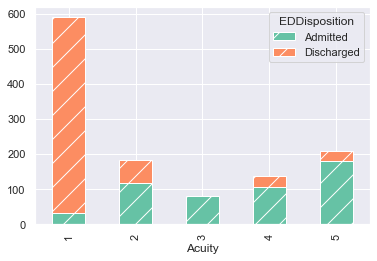

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

df_EDVisits.groupby(['Acuity','EDDisposition']).size().unstack().plot(kind='bar', stacked=True,hatch="/")


# Q78:Find reasonForVisit with highest count of acuity 5 patients

In [232]:
df_EDVisits.head()
df_EDVisits.loc[df_EDVisits['Acuity']==5,['Acuity','ReasonForVisit']].reset_index(drop=True)

,Acuity,ReasonForVisit
0,5,Car Accident
1,5,Chest Pain
2,5,Chest Pain
3,5,Chest Pain
4,5,Shortness of Breath
...,...,...
204,5,Shortness of Breath
205,5,Shortness of Breath
206,5,Shortness of Breath
207,5,Shortness of Breath


# Q79:Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [233]:
#using groupby function

grouped=df_ReAdmissionRegistry.groupby('PrimaryDiagnosis')['ExpectedLOS'].max()-df_ReAdmissionRegistry.groupby('PrimaryDiagnosis')['ExpectedLOS'].min()
grouped.sort_values(ascending=False).head(1)

PrimaryDiagnosis
Pneumonia    13.800759
Name: ExpectedLOS, dtype: float64

# Q80:Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups)

In [234]:
df_Providers.head()
grouped=df_Providers.groupby('ProviderSpecialty')
list(grouped)

[('Cardiology',
      ProviderID   ProviderName ProviderSpecialty     ProviderDateOnStaff
  16          17   Kent Kendall        Cardiology 2001-12-22 11:18:32.919
  17          18     Ryan Kevin        Cardiology 2003-01-14 21:16:34.778
  18          19   Tyler Conner        Cardiology 2003-07-09 02:41:40.410
  19          20  Bailey Barret        Cardiology 2003-08-20 16:05:50.179
  20          21    Megan Bonco        Cardiology 2004-02-17 21:22:30.546
  21          22  Joesph Walter        Cardiology 2005-02-04 11:40:44.121
  22          23    Walter King        Cardiology 2006-03-12 22:11:58.070
  23          24      Luke Long        Cardiology 2006-04-28 00:16:36.762),
 ('Pediatrics',
     ProviderID    ProviderName ProviderSpecialty     ProviderDateOnStaff
  0           1       Sally Sue        Pediatrics 1993-01-01 00:00:00.000
  1           2      Mike Myers        Pediatrics 1993-05-02 00:00:17.695
  2           3  Jordan Michael        Pediatrics 1993-06-24 21:31:46.687
  3 

# Q81:Display full name of patients

In [235]:
Patients_fullname = pd.DataFrame()
Patients_fullname['Patient Full Name'] = df_Patients['FirstName'] + ' ' + df_Patients['LastName']
Patients_fullname

,Patient Full Name
0,Lanni Sue
1,Far Myers
2,Devlin Michael
3,Carmine Texas
4,Tann Bama
...,...
940,Wat Fideler
941,Wandie Baythrop
942,Diahann Smeeton
943,Panchito Sharple


# Q82:Retrieve the rows where SBP<140 and DBP<80

In [236]:
df_AmbulatoryVisits[(df_AmbulatoryVisits.BloodPressureSystolic < 140 ) & (df_AmbulatoryVisits.BloodPressureDiastolic < 80)]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,2019-03-16,2019-02-26 17:42:39.779,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,2019-01-21,2019-01-07 06:04:17.575,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2019-02-05,2019-01-10 05:43:34.544,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.896818,68.496869,Canceled


# Q83:Create the plot where x= np.arange(0, 10, 0.1) and y= np.sin(np.pi * x) + x by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]

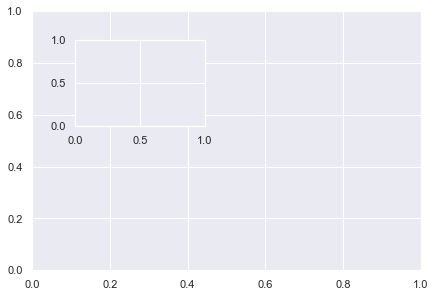

In [238]:
# Original plot
fig = plt.figure()
# Adding new empty axes
fig.add_axes([0.1,0.1,0.9,0.9])  
fig.add_axes([0.2,0.6,0.3,0.3])    
plt.show()

# Q84:Find the list of patients whose ExpectedLOS is greater than the value given by the user

In [239]:
list(df_Discharges[df_Discharges.ExpectedLOS>df_Discharges.LOS]['PatientID'])

[9,
 101,
 102,
 134,
 144,
 147,
 156,
 157,
 166,
 169,
 178,
 192,
 193,
 203,
 210,
 230,
 233,
 293,
 316,
 328,
 352,
 363,
 364,
 367,
 407,
 409,
 420,
 431,
 432,
 442,
 453,
 455,
 466,
 473,
 474,
 488,
 513,
 560,
 580,
 582,
 588,
 593,
 608,
 709,
 1,
 2,
 3,
 6,
 7,
 8,
 11,
 14,
 16,
 20,
 23,
 27,
 28,
 38,
 39,
 40,
 41,
 42,
 45,
 56,
 57,
 59,
 60,
 62,
 63,
 64,
 74,
 77,
 78,
 79,
 81,
 83,
 89,
 90,
 91,
 92,
 95,
 100,
 104,
 108,
 111,
 112,
 113,
 114,
 119,
 122,
 123,
 124,
 126,
 127,
 133,
 23,
 137,
 139,
 20,
 146,
 148,
 149,
 155,
 159,
 161,
 167,
 168,
 170,
 172,
 177,
 179,
 180,
 188,
 115,
 194,
 195,
 698,
 201,
 202,
 204,
 205,
 208,
 212,
 214,
 215,
 218,
 219,
 221,
 222,
 223,
 14,
 225,
 232,
 235,
 236,
 237,
 244,
 245,
 246,
 247,
 249,
 250,
 251,
 254,
 255,
 256,
 257,
 258,
 259,
 262,
 264,
 266,
 267,
 268,
 269,
 270,
 271,
 273,
 274,
 278,
 279,
 282,
 283,
 284,
 290,
 292,
 302,
 304,
 306,
 307,
 314,
 317,
 326,
 327,
 329

# Q85:Find count of Black/African American, English Females

In [240]:
df_Patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [241]:
len(df_Patients[(df_Patients.Gender=='Female')&((df_Patients.Race=='Black')|(df_Patients.Race=='African'))&(df_Patients.Language=='English')])


0

In [242]:
len(df_Patients[(df_Patients.Gender=='Female')&(df_Patients.Language=='English')&(df_Patients.Race=='Black/African-American')])

119